<a href="https://colab.research.google.com/github/piegez/ai_generated_test/blob/main/object_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten()
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=128)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.0811 - loss: 7.9248 - val_accuracy: 0.1030 - val_loss: 7.3778
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.0982 - loss: 7.3778 - val_accuracy: 0.1030 - val_loss: 7.3778
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - accuracy: 0.0992 - loss: 7.3778 - val_accuracy: 0.1030 - val_loss: 7.3778
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.0982 - loss: 7.3778 - val_accuracy: 0.1030 - val_loss: 7.3778
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 111ms/step - accuracy: 0.0983 - loss: 7.3778 - val_accuracy: 0.1030 - val_loss: 7.3778


In [7]:
features = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step


In [8]:
nn = NearestNeighbors(n_neighbors=6, metric='cosine')
nn.fit(features)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [9]:
def get_recommendations(image_index):
    query = features[image_index].reshape(1, -1)
    distances, indices = nn.kneighbors(query)
    return indices[0][1:]  # Excluir o próprio item

In [10]:
def plot_recommendations(image_index):
    recommendations = get_recommendations(image_index)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 6, 1)
    plt.imshow(x_train[image_index].reshape(28, 28), cmap='gray')
    plt.title("Consulta")
    plt.axis('off')

    for i, rec_index in enumerate(recommendations):
        plt.subplot(1, 6, i+2)
        plt.imshow(x_train[rec_index].reshape(28, 28), cmap='gray')
        plt.title(f"Rec {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

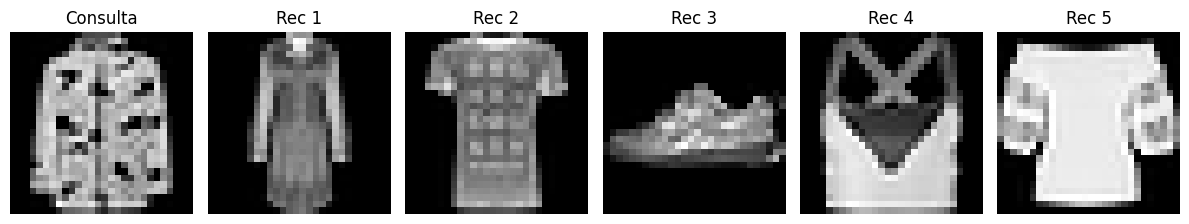

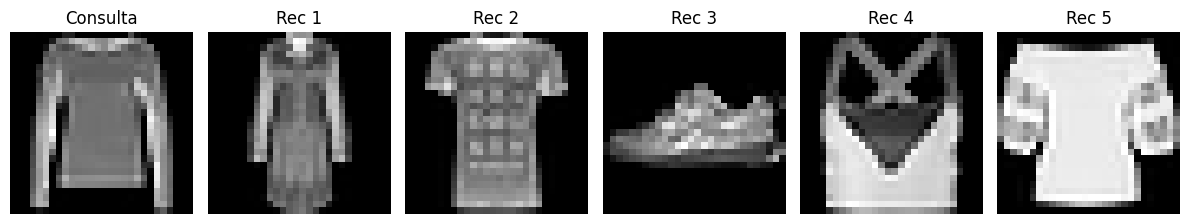

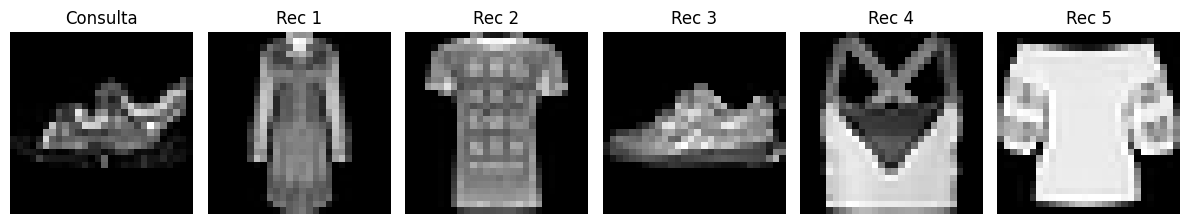

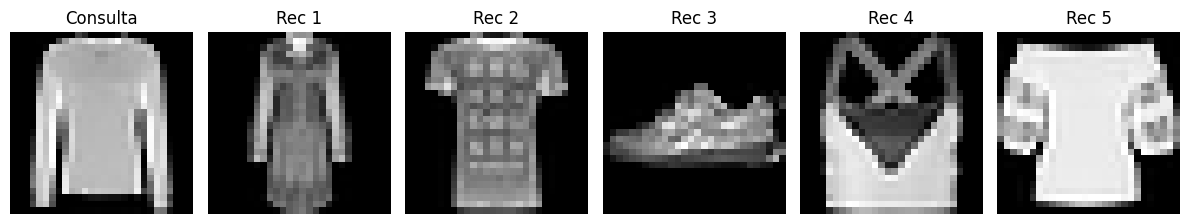

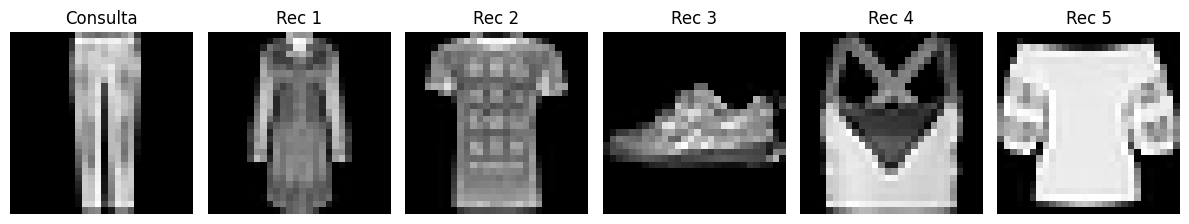

In [11]:
for _ in range(5):  # Mostrar 5 exemplos
    random_index = np.random.randint(0, len(x_train))
    plot_recommendations(random_index)